# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [92]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
data = pd.read_csv('data/SINASC/SINASC_RO_2019.csv')

sinasc = pd.DataFrame(data)

print(sinasc.shape)

(27028, 69)


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [94]:
def categoria_apgar5(apgar5):

    if 8 <= apgar5 <= 10:
        return 'normal'
    elif 6 <= apgar5 < 8:
        return 'asfixia leve'
    elif 4 <= apgar5 < 6:
        return 'asfixia moderada'
    elif 0 <= apgar5 < 4:
        return 'asfixia severa'
    else:
        return 'não categorizado'

sinasc['APGAR5_categoria'] = sinasc['APGAR5'].apply(categoria_apgar5)

apgar5_counts = sinasc['APGAR5_categoria'].value_counts()

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

c:\Users\BR0394469758\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BR0394469758\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BR0394469758\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BR0394469758\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

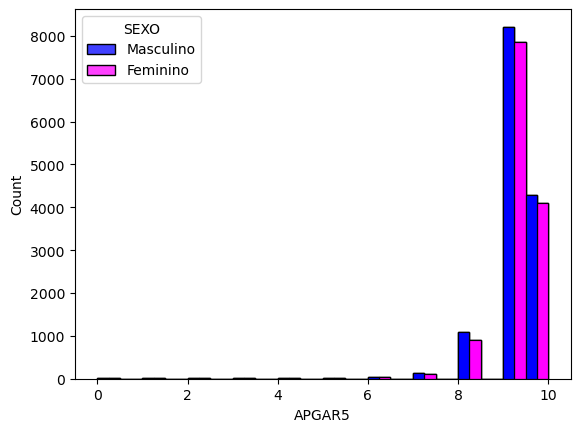

In [102]:
def graficos(status_gestacao):
    pd.option_context('mode.use_inf_as_na', True),
    plot = sns.histplot(
        data = sinasc[sinasc['GESTACAO'] == status_gestacao],
        x = data['APGAR5'],
        binwidth = .5,

        hue = sinasc['SEXO'],
        palette = {'Masculino': 'blue', 'Feminino': 'magenta'},
        multiple = 'dodge'
        )
  
status_gestacao_lista = ['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas', '22 a 27 semanas', '28 a 31 semanas',np.nan , 'Menos de 22 semanas']

for status_gestacao in status_gestacao_lista:
    graficos(status_gestacao)

#fig = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

# sns.histplot(
#     data = sinasc_gestacao,
#     x = sinasc['APGAR5'],
#     binwidth = .5,

#     hue = 'SEXO',
#     palette = {'Masculino': 'blue', 'Feminino': 'pink'},
#     alpha = .8,
#     multiple = 'dodge',
#     )



####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.